In [3]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("DMC_330020_Quinta_Normal_Santiago_media.csv",sep=";")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19995 entries, 0 to 19994
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    19995 non-null  int64 
 1   month   19995 non-null  int64 
 2   day     19995 non-null  int64 
 3   value   19995 non-null  object
dtypes: int64(3), object(1)
memory usage: 625.0+ KB


In [6]:
data["value"]=data["value"].apply(lambda x: float(x.replace(",",".")))
Y=data[(data["year"] == 2022) | (data["year"]==2021)]
y=Y["value"].to_numpy()
T=data[(data["year"] == 2023)]
t=T["value"].to_numpy()

In [15]:
x=[i for i in range(1,len(y)+1)]

In [32]:
xf=[i for i in range(len(y)+1,len(y)+len(t)+1)]

In [7]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 18821 to 19550
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    730 non-null    int64  
 1   month   730 non-null    int64  
 2   day     730 non-null    int64  
 3   value   730 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.5 KB


In [8]:
T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 19551 to 19915
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    365 non-null    int64  
 1   month   365 non-null    int64  
 2   day     365 non-null    int64  
 3   value   365 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 14.3 KB


In [9]:
Y.tail(n=12)

,year,month,day,value
19539,2022,12,20,20.6
19540,2022,12,21,22.5
19541,2022,12,22,20.9
19542,2022,12,23,21.3
19543,2022,12,24,22.6
19544,2022,12,25,21.5
19545,2022,12,26,18.6
19546,2022,12,27,21.2
19547,2022,12,28,22.6
19548,2022,12,29,24.1


In [10]:
T.tail(n=12)

,year,month,day,value
19904,2023,12,20,18.7
19905,2023,12,21,20.9
19906,2023,12,22,21.4
19907,2023,12,23,23.3
19908,2023,12,24,20.6
19909,2023,12,25,23.4
19910,2023,12,26,21.7
19911,2023,12,27,19.8
19912,2023,12,28,16.6
19913,2023,12,29,20.2


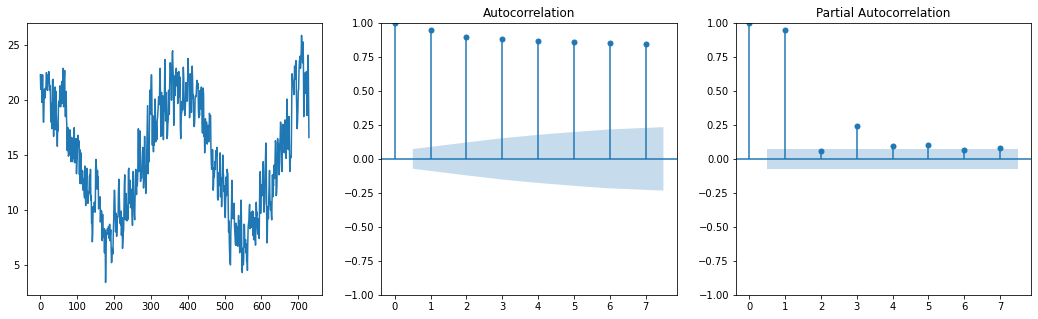

In [11]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([i for i in range(len(y))],y)
plot_acf(y,ax=axes[1],lags=7);
plot_pacf(y,method="ywm",lags=7,ax=axes[2]);

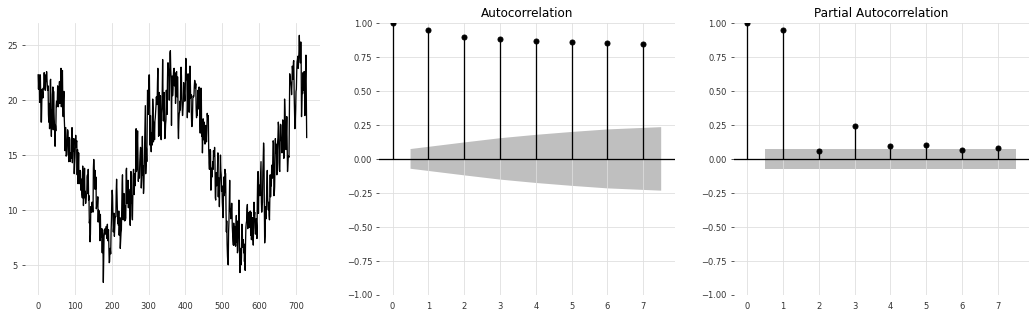

In [145]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([i for i in range(len(y))],y)
plot_acf(y,ax=axes[1],lags=7);
plot_pacf(y,method="ywm",lags=7,ax=axes[2]);

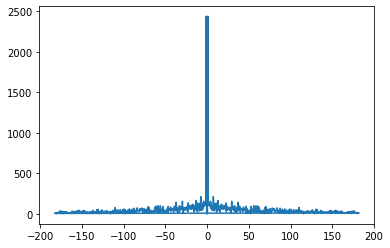

In [24]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq

media=np.mean(y)
yn=y-media
yf=fft(yn)
xf=fftfreq(len(x),1/365)
plt.plot(xf,np.abs(yf))
plt.show()

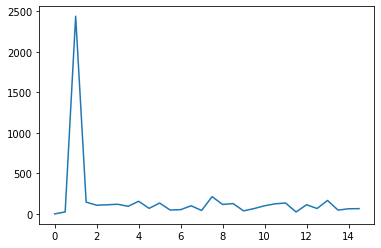

In [25]:
yf=rfft(yn)
xf=rfftfreq(len(x),1/365)
plt.plot(xf[0:30],np.abs(yf)[0:30])
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

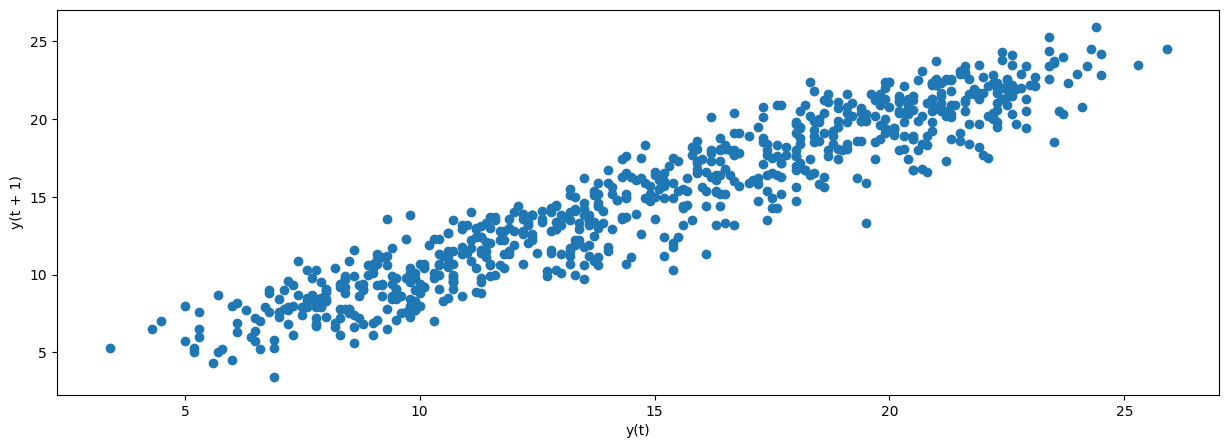

In [12]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 5)
pd.plotting.lag_plot(Y["value"], lag=1,ax=axes)

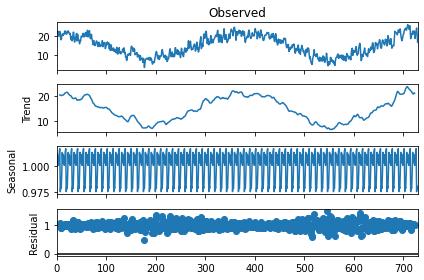

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(y,model="multiplicative",period=12)
result.plot();

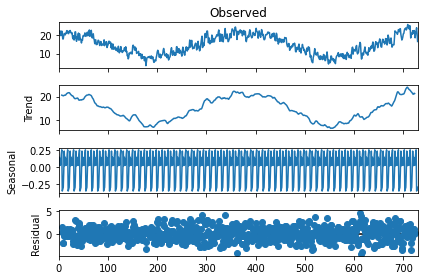

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(y,model="additive",period=12)
result.plot();

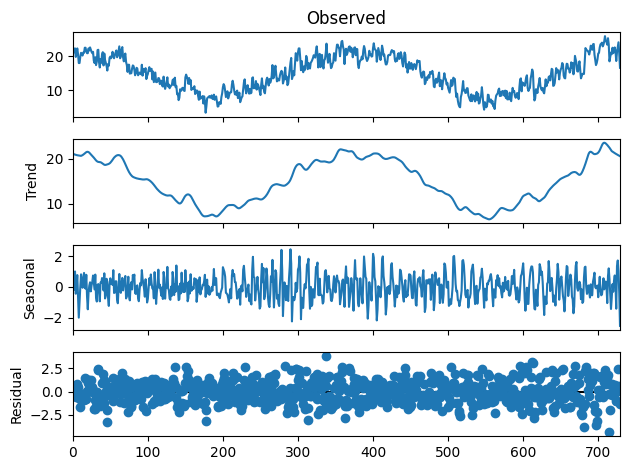

In [15]:
from statsmodels.tsa.seasonal import STL

stl = STL(y,period=12)
res_new = stl.fit()
res_new.plot();

Cuando se rechaza la hipótesis del test (p<0.05), la serie es estacionaria, de lo contrario no es estacionaria

In [19]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y,maxlag=1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.224816
p-value: 0.000598
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [20]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.039830
p-value: 0.269387
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [35]:
from pmdarima.arima import CHTest
from pmdarima.arima import nsdiffs

CHTest(m=180).estimate_seasonal_differencing_term(y)

1

El modelo demora más o menos 6 minutos hasta converger

MSE 3.160700979919987
AIC 2737.9141459264724


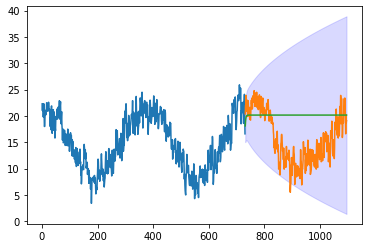

In [42]:
modelo1=ARIMA(y,order=(1,1,1))
m1=modelo1.fit()
m1_p = m1.get_forecast(steps=len(t))
m1_ci = m1_p.conf_int(0.05)
plt.plot(x,y,xf,t,xf,m1_p.predicted_mean)
plt.fill_between(xf, m1_ci[:,0], m1_ci[:,1], color='b', alpha=.15);
print("MSE",m1.mse)
print("AIC",m1.aic)

MSE 3.0891887142262306
AIC 2720.6205276328405


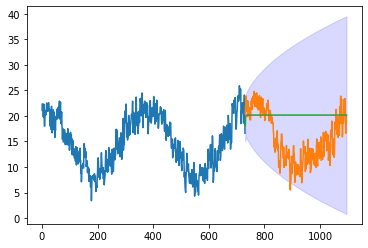

In [43]:
modelo1=ARIMA(y,order=(1,1,3))
m1=modelo1.fit()
m1_p = m1.get_forecast(steps=len(t))
m1_ci = m1_p.conf_int(0.05)
plt.plot(x,y,xf,t,xf,m1_p.predicted_mean)
plt.fill_between(xf, m1_ci[:,0], m1_ci[:,1], color='b', alpha=.15);
print("MSE",m1.mse)
print("AIC",m1.aic)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE 2.7700740127258308
AIC 2795.547892236166


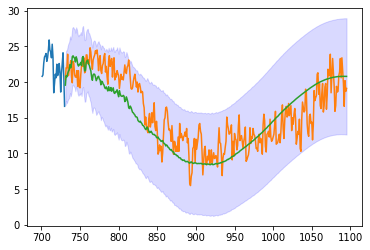

In [44]:
modelo1=ARIMA(y,order=(90,1,3))
m1=modelo1.fit()
m1_p = m1.get_forecast(steps=len(t))
m1_ci = m1_p.conf_int(0.05)
plt.plot(x[700:],y[700:],xf,t,xf,m1_p.predicted_mean)
plt.fill_between(xf, m1_ci[:,0], m1_ci[:,1], color='b', alpha=.15);
print("MSE",m1.mse)
print("AIC",m1.aic)

In [45]:
from scipy.stats import pearsonr
print("correlacion con 2022",pearsonr(y[365:],m1_p.predicted_mean))
print("correlacion con 2023",pearsonr(t,m1_p.predicted_mean))

correlacion con 2022 PearsonRResult(statistic=0.9127842322239308, pvalue=3.1728646029422746e-143)
correlacion con 2023 PearsonRResult(statistic=0.8297059533326381, pvalue=6.125417865003768e-94)


In [46]:
D=pd.DataFrame()
D["value"]=Y["value"].diff(periods=1)

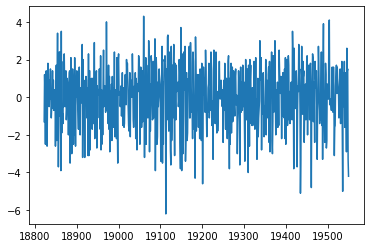

In [47]:
plt.plot(D["value"])

In [48]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 18821 to 19550
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [49]:
Y.head()

,year,month,day,value
18821,2021,1,1,22.3
18822,2021,1,2,21.0
18823,2021,1,3,22.2
18824,2021,1,4,22.3
18825,2021,1,5,19.8


In [50]:
data.query("year==2020 and month==12 and day==31")

,year,month,day,value
18820,2020,12,31,23.0


In [51]:
data.query("year==2021 and month==1 and day==1")

,year,month,day,value
18821,2021,1,1,22.3


In [57]:
D["value"].iloc[0]=-0.7

In [58]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 18821 to 19550
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


In [59]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(D["value"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.711444
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.866
	10%: -2.569


In [60]:
d=D["value"].to_numpy()

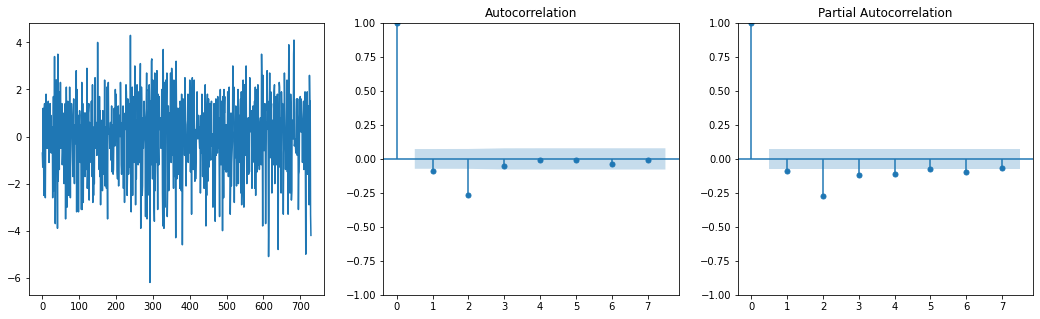

In [62]:
fig, axes = plt.subplots(1,3)
fig.set_size_inches(18, 5)
axes[0].plot([i for i in range(len(d))],d)
plot_acf(d,ax=axes[1],lags=7);
plot_pacf(d,method="ywm",lags=7,ax=axes[2]);

In [72]:
TD=pd.DataFrame()
TD["value"]=T["value"].diff(periods=1)

In [73]:
T.head()

,year,month,day,value
19551,2023,1,1,20.4
19552,2023,1,2,22.0
19553,2023,1,3,22.0
19554,2023,1,4,23.9
19555,2023,1,5,20.9


In [74]:
TD.head()

,value
19551,NaN
19552,1.6
19553,0.0
19554,1.9
19555,-3.0


In [81]:
data.query("year==2022 and month==12 and day==31")

,year,month,day,value
19550,2022,12,31,16.6


In [82]:
data.query("year==2023 and month==1 and day==1")

,year,month,day,value
19551,2023,1,1,20.4


In [83]:
TD["value"].iloc[0]=3.8

In [84]:
td=TD["value"].to_numpy()

In [85]:
modelo2=ARIMA(d,order=(2,1,2))
m2=modelo2.fit()
m2_p = m2.get_forecast(steps=len(t))
m2_ci = m2_p.conf_int(0.05)

MSE 2.428659409195677
AIC 2728.141709971651


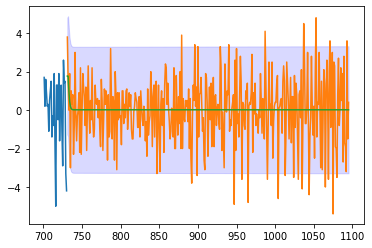

In [86]:
plt.plot(x[700:],d[700:],xf,td,xf,m2_p.predicted_mean)
plt.fill_between(xf, m2_ci[:,0], m2_ci[:,1], color='b', alpha=.15);
print("MSE",m2.mse)
print("AIC",m2.aic)

In [87]:
from scipy.stats import pearsonr
print("correlacion con 2022",pearsonr(d[365:],m2_p.predicted_mean))
print("correlacion con 2023",pearsonr(td,m2_p.predicted_mean))

correlacion con 2022 PearsonRResult(statistic=-0.00810258926098661, pvalue=0.8773958181715122)
correlacion con 2023 PearsonRResult(statistic=0.10930715432257113, pvalue=0.036851484367888904)


In [96]:
from darts.models import NaiveSeasonal
from darts import TimeSeries

In [125]:
ts=TimeSeries.from_values(y)
model = NaiveSeasonal(K=90)
model.fit(ts)
pred = model.predict(365)

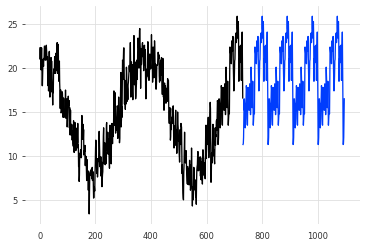

In [130]:
plt.plot(x,y,xf,pred.univariate_values())

In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#modelo2 = SARIMAX(endog = y, order = (1, 1, 1), seasonal_order = (1, 1, 1, 365))
#modelo2_res = modelo2.fit()
#modelo2_res.summary()

In [135]:
yd=D["value"]
model = pm.auto_arima(yd, 
                      m=90,                                   
                      seasonal=True,      
                      d=1,             
                      test='adf',         
                      start_p=0, start_q=0,
                      max_p=12, max_q=12,
                      start_P=1,start_Q=1,
                      max_P=12,max_Q=12,
                      D=None,             
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[90] intercept   : AIC=inf, Time=15.97 sec
 ARIMA(0,1,0)(0,0,0)[90] intercept   : AIC=3386.007, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[90] intercept   : AIC=3248.432, Time=3.20 sec
 ARIMA(0,1,1)(0,0,1)[90] intercept   : AIC=inf, Time=14.25 sec
 ARIMA(0,1,0)(0,0,0)[90]             : AIC=3384.010, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[90] intercept   : AIC=3247.064, Time=0.04 sec
 ARIMA(1,1,0)(0,0,1)[90] intercept   : AIC=3248.372, Time=3.10 sec
 ARIMA(1,1,0)(1,0,1)[90] intercept   : AIC=inf, Time=15.36 sec
 ARIMA(2,1,0)(0,0,0)[90] intercept   : AIC=3101.577, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[90] intercept   : AIC=3102.739, Time=4.37 sec
 ARIMA(2,1,0)(0,0,1)[90] intercept   : AIC=3102.678, Time=4.03 sec
 ARIMA(2,1,0)(1,0,1)[90] intercept   : AIC=inf, Time=22.06 sec
 ARIMA(3,1,0)(0,0,0)[90] intercept   : AIC=3029.355, Time=0.08 sec
 ARIMA(3,1,0)(1,0,0)[90] intercept   : AIC=3031.305, Time=4.92 sec
 ARIMA(3,1,0)(0,0,1)[90] intercept 

In [136]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  730
Model:              SARIMAX(11, 1, 2)   Log Likelihood               -1353.087
Date:                Mon, 01 Apr 2024   AIC                           2734.173
Time:                        16:35:11   BIC                           2798.457
Sample:                             0   HQIC                          2758.976
                                - 730                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7285      0.042     17.474      0.000       0.647       0.810
ar.L2         -0.1662      0.046     -3.623      0.000      -0.256      -0.076
ar.L3          0.1242      0.047      2.629      0.009       0.032       0.217
ar.L4          0.0015      0.048      0.030      0.976      -0.094       0.096
ar.L5          0.0304      0.045      0.676      0.499      -0.058       0.119
ar.L6         -0.0135      0.046     -0.295      0.768      -0.103       0.076
ar.L7          0.0187      0.050      0.377      0.706      -0.079       0.116
ar.L8          0.0112      0.049      0.227      0.821      -0.086       0.108
ar.L9         -0.0170      0.046     -0.371      0.711      -0.107       0.073
ar.L10        -0.0108      0.048     -0.225      0.822      -0.105       0.083
ar.L11         0.0303      0.041      0.741      0.459      -0.050       0.111
ma.L1         -1.9595      0.025    -77.257      0.000      -2.009      -1.910
ma.L2          0.9620      0.025     38.624      0.000       0.913       1.011
sigma2         2.3442      0.127     18.414      0.000       2.095       2.594
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                15.89
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.36
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
yp=model.predict(365)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


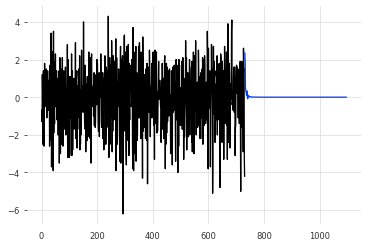

In [140]:
plt.plot(x,yd,xf,yp)